# (tweet_Fraud_actions Data Exploration)
## by (Hanan Ali)

## Preliminary Wrangling

> In This document I'm exploring tweets dataset dealing trying to figure out some abnormalities in actions of the accounts according to time of creation and time of tweeting.

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sb
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweet1 = pd.read_csv("data/tweets_2020_lite.csv")
tweet1.head()

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at
0,1214659714698633223,2020-01-07 21:26:57+00:00,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,2015-08-12 03:54:29+00:00
1,1214658467836956673,2020-01-07 21:22:00+00:00,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,2019-04-01 16:38:25+00:00
2,1214657580837953536,2020-01-07 21:18:29+00:00,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,2010-04-14 05:22:22+00:00
3,1214654926342758400,2020-01-07 21:07:56+00:00,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2013-11-01 23:00:04+00:00
4,1214649017851957249,2020-01-07 20:44:27+00:00,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2012-09-10 21:58:09+00:00


In [3]:
tweet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612583 entries, 0 to 612582
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_str            612583 non-null  int64 
 1   created_at        612583 non-null  object
 2   full_text         612583 non-null  object
 3   user.id_str       612583 non-null  int64 
 4   user.screen_name  612583 non-null  object
 5   user.name         612541 non-null  object
 6   user.created_at   612583 non-null  object
dtypes: int64(2), object(5)
memory usage: 32.7+ MB


## Data Wrangling

> Preparing the time diff. and days diff between usr created and tweet 


In [4]:
tweet1["user.created_at"] = tweet1["user.created_at"].astype(str).str.split("+").str[0]
tweet1["created_at"] = tweet1["created_at"].astype(str).str.split("+").str[0]

In [5]:
my_format = '%Y-%m-%d %H:%M:%S'
tweet1['user.created_at'] = pd.to_datetime(tweet1['user.created_at'], format=my_format)
tweet1['created_at'] = pd.to_datetime(tweet1['created_at'], format=my_format)

In [6]:
tweet1['diff'] = abs(tweet1['user.created_at'] - tweet1['created_at'])
tweet1

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,diff
0,1214659714698633223,2020-01-07 21:26:57,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,2015-08-12 03:54:29,1609 days 17:32:28
1,1214658467836956673,2020-01-07 21:22:00,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,2019-04-01 16:38:25,281 days 04:43:35
2,1214657580837953536,2020-01-07 21:18:29,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,2010-04-14 05:22:22,3555 days 15:56:07
3,1214654926342758400,2020-01-07 21:07:56,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2013-11-01 23:00:04,2257 days 22:07:52
4,1214649017851957249,2020-01-07 20:44:27,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2012-09-10 21:58:09,2674 days 22:46:18
...,...,...,...,...,...,...,...,...
612578,1335460896550789121,2020-12-06 05:47:44,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,Irina Skywalker,2020-05-30 12:47:40,189 days 17:00:04
612579,1335460475996237824,2020-12-06 05:46:03,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,isabella,2020-08-19 03:27:02,109 days 02:19:01
612580,1335460343460540417,2020-12-06 05:45:32,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,Harleycosplay,2020-10-07 16:33:47,59 days 13:11:45
612581,1335459902752317442,2020-12-06 05:43:47,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,Jeon Ji-hye,2014-12-10 12:17:42,2187 days 17:26:05


In [7]:
tweet1["days_diff"] = tweet1["diff"].astype(str).str.split(" ").str[0]
tweet1["time_diff"] = tweet1["diff"].astype(str).str.split(" ").str[2]
tweet1.drop(['diff'], axis=1, inplace=True)

In [9]:
tweet1

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,days_diff,time_diff
0,1214659714698633223,2020-01-07 21:26:57,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,2015-08-12 03:54:29,1609,17:32:28
1,1214658467836956673,2020-01-07 21:22:00,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,2019-04-01 16:38:25,281,04:43:35
2,1214657580837953536,2020-01-07 21:18:29,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,2010-04-14 05:22:22,3555,15:56:07
3,1214654926342758400,2020-01-07 21:07:56,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2013-11-01 23:00:04,2257,22:07:52
4,1214649017851957249,2020-01-07 20:44:27,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2012-09-10 21:58:09,2674,22:46:18
...,...,...,...,...,...,...,...,...,...
612578,1335460896550789121,2020-12-06 05:47:44,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,Irina Skywalker,2020-05-30 12:47:40,189,17:00:04
612579,1335460475996237824,2020-12-06 05:46:03,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,isabella,2020-08-19 03:27:02,109,02:19:01
612580,1335460343460540417,2020-12-06 05:45:32,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,Harleycosplay,2020-10-07 16:33:47,59,13:11:45
612581,1335459902752317442,2020-12-06 05:43:47,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,Jeon Ji-hye,2014-12-10 12:17:42,2187,17:26:05


In [11]:
def tweet_usr_date_time(df):
    df['tweet_date'] = df.created_at.astype(str).str.split(" ").str[0]
    df['tweet_time'] = df.created_at.astype(str).str.split(" ").str[1]
    df['user_create_date'] = df["user.created_at"].astype(str).str.split(" ").str[0]
    df['user_create_time'] = df["user.created_at"].astype(str).str.split(" ").str[1]
    df = df.reset_index(drop=True)
    return df
tweet_usr_date_time(tweet1)

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,days_diff,time_diff,tweet_date,tweet_time,user_create_date,user_create_time
0,1214659714698633223,2020-01-07 21:26:57,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,2015-08-12 03:54:29,1609,17:32:28,2020-01-07,21:26:57,2015-08-12,03:54:29
1,1214658467836956673,2020-01-07 21:22:00,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,2019-04-01 16:38:25,281,04:43:35,2020-01-07,21:22:00,2019-04-01,16:38:25
2,1214657580837953536,2020-01-07 21:18:29,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,2010-04-14 05:22:22,3555,15:56:07,2020-01-07,21:18:29,2010-04-14,05:22:22
3,1214654926342758400,2020-01-07 21:07:56,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2013-11-01 23:00:04,2257,22:07:52,2020-01-07,21:07:56,2013-11-01,23:00:04
4,1214649017851957249,2020-01-07 20:44:27,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2012-09-10 21:58:09,2674,22:46:18,2020-01-07,20:44:27,2012-09-10,21:58:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612578,1335460896550789121,2020-12-06 05:47:44,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,Irina Skywalker,2020-05-30 12:47:40,189,17:00:04,2020-12-06,05:47:44,2020-05-30,12:47:40
612579,1335460475996237824,2020-12-06 05:46:03,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,isabella,2020-08-19 03:27:02,109,02:19:01,2020-12-06,05:46:03,2020-08-19,03:27:02
612580,1335460343460540417,2020-12-06 05:45:32,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,Harleycosplay,2020-10-07 16:33:47,59,13:11:45,2020-12-06,05:45:32,2020-10-07,16:33:47
612581,1335459902752317442,2020-12-06 05:43:47,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,Jeon Ji-hye,2014-12-10 12:17:42,2187,17:26:05,2020-12-06,05:43:47,2014-12-10,12:17:42


In [12]:
drop_list = ['user_create_date', 'tweet_date']
def y_m_d(df):
    df['tweet_date'] = pd.to_datetime(df['tweet_date'])
    df['tweet_year'] = (df.tweet_date.dt.strftime('%Y')).astype('int')
    df['tweet_day'] = df.tweet_date.dt.strftime('%B')
    df['tweet_month'] = df.tweet_date.dt.strftime('%A')
    
    df['user_create_date'] = pd.to_datetime(df['user_create_date'])
    df['usr_year'] = (df.user_create_date.dt.strftime('%Y')).astype('int')
    df['usr_day'] = df.user_create_date.dt.strftime('%B')
    df['usr_month'] = df.user_create_date.dt.strftime('%A')
    
    df.drop(drop_list, axis=1, inplace=True)
    return df
y_m_d(tweet1)

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,days_diff,time_diff,tweet_time,user_create_time,tweet_year,tweet_day,tweet_month,usr_year,usr_day,usr_month
0,1214659714698633223,2020-01-07 21:26:57,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,SpecSpiderKen,2015-08-12 03:54:29,1609,17:32:28,21:26:57,03:54:29,2020,January,Tuesday,2015,August,Wednesday
1,1214658467836956673,2020-01-07 21:22:00,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,Lumos,2019-04-01 16:38:25,281,04:43:35,21:22:00,16:38:25,2020,January,Tuesday,2019,April,Monday
2,1214657580837953536,2020-01-07 21:18:29,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,h a v e n,2010-04-14 05:22:22,3555,15:56:07,21:18:29,05:22:22,2020,January,Tuesday,2010,April,Wednesday
3,1214654926342758400,2020-01-07 21:07:56,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,‍ ‍ ‍ #9ToEternityWithEXO ‍,2013-11-01 23:00:04,2257,22:07:52,21:07:56,23:00:04,2020,January,Tuesday,2013,November,Friday
4,1214649017851957249,2020-01-07 20:44:27,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,Mrs. Parker🔪,2012-09-10 21:58:09,2674,22:46:18,20:44:27,21:58:09,2020,January,Tuesday,2012,September,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612578,1335460896550789121,2020-12-06 05:47:44,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,Irina Skywalker,2020-05-30 12:47:40,189,17:00:04,05:47:44,12:47:40,2020,December,Sunday,2020,May,Saturday
612579,1335460475996237824,2020-12-06 05:46:03,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,isabella,2020-08-19 03:27:02,109,02:19:01,05:46:03,03:27:02,2020,December,Sunday,2020,August,Wednesday
612580,1335460343460540417,2020-12-06 05:45:32,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,Harleycosplay,2020-10-07 16:33:47,59,13:11:45,05:45:32,16:33:47,2020,December,Sunday,2020,October,Wednesday
612581,1335459902752317442,2020-12-06 05:43:47,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,Jeon Ji-hye,2014-12-10 12:17:42,2187,17:26:05,05:43:47,12:17:42,2020,December,Sunday,2014,December,Wednesday


> Saved the tweet1 in a csv file to countinue processing

In [13]:
tweet_df = pd.read_csv("tweet_diff.csv")

In [15]:
tweet_df

,full_text,user.id_str,user.screen_name,days,time,tweet_time,user_create_time,tweet_year,tweet_day,tweet_month,usr_year,usr_day,usr_month
0,@jackshitnobody He is a great actor . And ambe...,3416958298,Kenman_RiderW,1609,17:32:28,21:26:57,03:54:29,2020,Tuesday,January,2015,Wednesday,August
1,@thekjohnston One of his other lawyers is now ...,1112756109981421568,SkLumos,281,04:43:35,21:22:00,16:38:25,2020,Tuesday,January,2019,Monday,April
2,@taniaitzabel Yes! The only time i thought he ...,132788590,HavenFaithc,3555,15:56:07,21:18:29,05:22:22,2020,Tuesday,January,2010,Wednesday,April
3,una vez vi una amber heard en un personaje de ...,2164011551,Ieadsoo,2257,22:07:52,21:07:56,23:00:04,2020,Tuesday,January,2013,Friday,November
4,"7. #ElPadrastro (Nelson McCormick, 2009)\n\nEs...",816110136,mrsparker666,2674,22:46:18,20:44:27,21:58:09,2020,Tuesday,January,2012,Monday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612578,"@Allure_magazine Please help sign, share &amp;...",1266712663679107075,Irina_Skywalker,189,17:00:04,05:47:44,12:47:40,2020,Sunday,December,2020,Saturday,May
612579,i really want (as brutal as this may sound) th...,1295925179877474306,_isabella25_,109,02:19:01,05:46:03,03:27:02,2020,Sunday,December,2020,Wednesday,August
612580,EVERYONE : Cancel Amber Heard domestic abuser!...,1313880113864376320,Harleycosplay1,59,13:11:45,05:45:32,16:33:47,2020,Sunday,December,2020,Wednesday,October
612581,#JusticeForJohnnyDepp \n#JohnnyDeppIsInnocent ...,2925598034,Pinkprincess027,2187,17:26:05,05:43:47,12:17:42,2020,Sunday,December,2014,Wednesday,December


## Exploring some features

> after calculation of the days diff between the created usr and tweet in 2020 i found that

In [16]:
tweet_df[tweet_df.days < 1].shape[0]

3464

> Almost 3464 usrs created and tweeted in less than 24 ours mostly are offensive 

In [17]:
sorted_df_day_diff = tweet_df.sort_values(["days"], ascending=True)
sorted_df_day_diff.head(10)

,full_text,user.id_str,user.screen_name,days,time,tweet_time,user_create_time,tweet_year,tweet_day,tweet_month,usr_year,usr_day,usr_month
326755,apoyen para el regreso de johnny depp en pirat...,1326466056769196034,maousan11,0,00:11:03,10:18:02,10:06:59,2020,Wednesday,November,2020,Wednesday,November
419125,Fast forward to 2020 and after listening to th...,1323466582610366467,monterey_five,0,00:41:22,04:08:26,03:27:04,2020,Tuesday,November,2020,Tuesday,November
68072,Don’t blame Johnny Depp. If he’d as much as to...,1224033470768304128,JustHereVentin1,0,13:59:10,08:14:32,18:15:22,2020,Monday,February,2020,Sunday,February
393841,We are with you johnny .❤#JusticeForJohnnyDepp...,1323210607647248385,NeGiinbeiGii,0,00:09:47,10:39:37,10:29:50,2020,Monday,November,2020,Monday,November
419147,I’ve been reading into Amber Heard’s abuse of ...,1323466582610366467,monterey_five,0,00:36:34,04:03:38,03:27:04,2020,Tuesday,November,2020,Tuesday,November
507051,@WarnerChannelLA #JusticeForJohnnyDepp\n#Just...,1325080677067468801,Angie06502563,0,00:13:16,14:33:54,14:20:38,2020,Saturday,November,2020,Saturday,November
507044,#JusticeForJohnnyDepp\nNo puedo aceptar que so...,1325078648161005575,Andiara06892089,0,00:21:35,14:34:21,14:12:46,2020,Saturday,November,2020,Saturday,November
136641,Abusadora y mentirosa #AmberHeardIsAnAbuser,1249550987586605057,Flor29487004,0,00:15:25,04:28:01,04:12:36,2020,Monday,April,2020,Monday,April
610883,30 Años de lanzamiento de “Edward Scissorhands...,1335587203909640198,DeppUruguay,0,09:26:11,23:36:21,14:10:10,2020,Sunday,December,2020,Sunday,December
44323,@iOlovesyou @ThatBrianFella Brian never said y...,1232086796433002497,joha80460145,0,10:51:18,10:27:25,23:36:07,2020,Tuesday,February,2020,Monday,February


> sorted them in descending many have tweeted after creation of the new user with less than 12 minutes!

In [18]:
tweet_df['days'].describe()

count    612583.000000
mean       1705.633242
std        1416.830802
min           0.000000
25%         315.000000
50%        1435.000000
75%        3018.000000
max        5160.000000
Name: days, dtype: float64

## let's check the distribution for different features to visualize them correctly

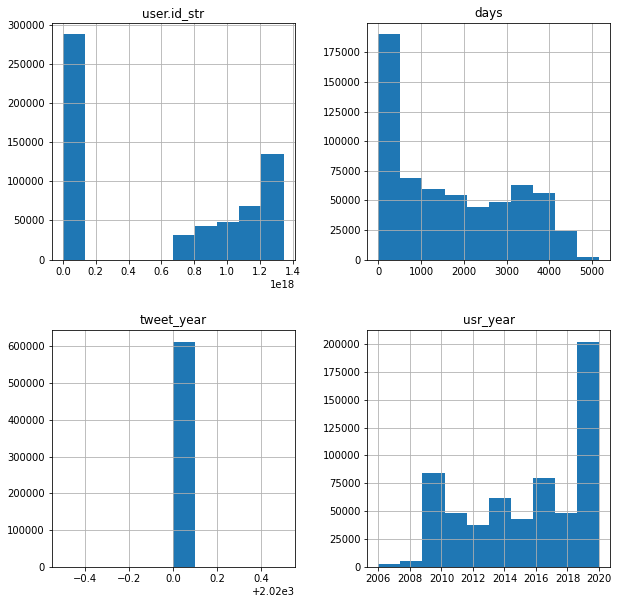

In [20]:
tweet_df.hist(figsize=(10,10));

## checking the distribution of the days

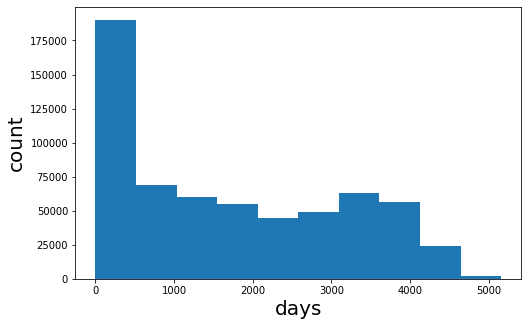

In [19]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'days')
plt.xlabel('days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.show();

> users tweeted in less than 24 hours after creation showing ubnormal count!

## usr creation counts in various years

In [21]:
tweet_df.usr_year.value_counts()

2020    132711
2019     69477
2009     51176
2011     48433
2018     48023
2015     42967
2017     42600
2012     37693
2016     37423
2010     33047
2013     31423
2014     30129
2008      5235
2007      2231
2006        15
Name: usr_year, dtype: int64

In [22]:
tweet_df.groupby("usr_year")["usr_month"].value_counts()

usr_year  usr_month
2006      December        8
          November        5
          August          1
          October         1
2007      May           853
                       ... 
2020      March        8791
          January      8623
          June         8412
          September    7810
          December     2949
Name: usr_month, Length: 172, dtype: int64

In [23]:
tweet_df.groupby("tweet_year")["usr_month"].value_counts()

tweet_year  usr_month
2020        November     61180
            July         59113
            August       55290
            April        54007
            May          53743
            June         52319
            March        49883
            January      48778
            October      45109
            December     44973
            February     44731
            September    43457
Name: usr_month, dtype: int64

> large no. in 2020 and 2019 and seems that specific months too will explore that later

## Let's explore more

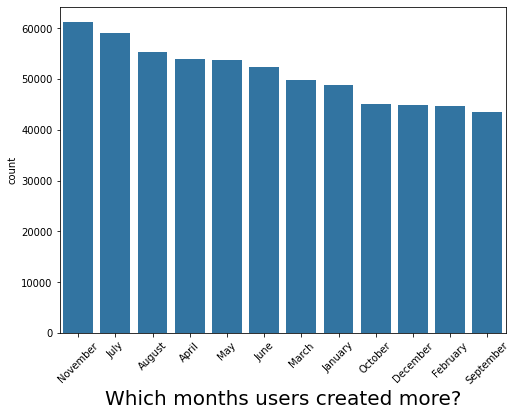

In [24]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = tweet_df['usr_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=tweet_df, x='usr_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('Which months users created more?', fontsize=20);

> seems that Nov. July., Aug., have more usrs created

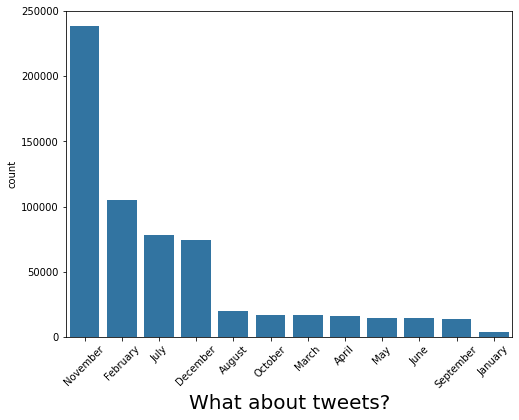

In [25]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = tweet_df['tweet_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=tweet_df, x='tweet_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('What about tweets?', fontsize=20);

> Nov., Feb., July., interesting matching .. must have some events

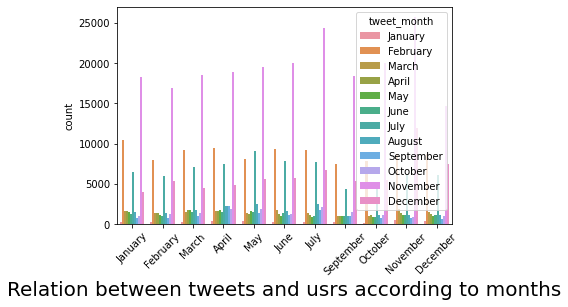

In [29]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','September','October','November','December']
sb.countplot(data = tweet_df, x='usr_month', order=month_order, hue='tweet_month')
plt.xticks(rotation=45);
plt.xlabel('Relation between tweets and usrs according to months', fontsize=20);

> Some months have common increase in usrs created and tweets tweeted by them .. sure for a reason

In [26]:
## making a cutting function
def cutting(col_name):    
    return pd.cut(tweet_df[col_name], bins=4, labels=['very low','low', 'medium','high'])
tweet_df['cut_days']=cutting('days')

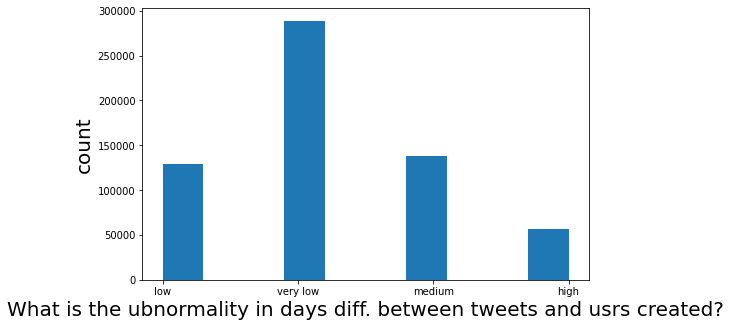

In [28]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'cut_days')
plt.xlabel('cut_days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xlabel('What is the ubnormality in days diff. between tweets and usrs created?', fontsize=20);
plt.show();


> users created and tweeted imm.after creation is the most common feature!

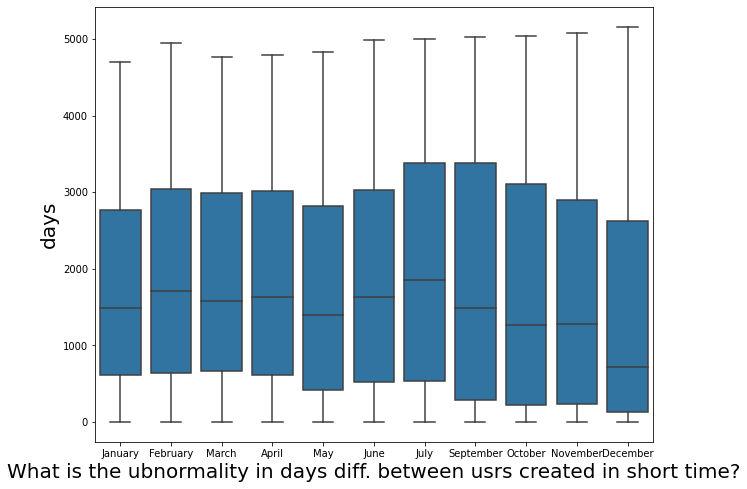

In [33]:
plt.figure(figsize=[10, 8])
sb.boxplot(data=tweet_df, x='tweet_month', y='days',order=month_order, color=base_color);
plt.xlabel('tweet_month', fontsize=20);
plt.ylabel('days', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time?', fontsize=20);


> in nov., oct. and dec. the days diff is less than one day more than other months

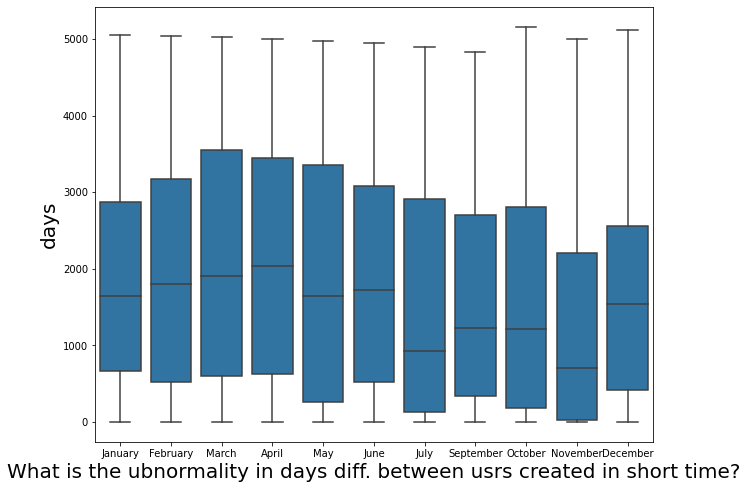

In [35]:
plt.figure(figsize=[10, 8])
sb.boxplot(data=tweet_df, x='usr_month', y='days',order=month_order, color=base_color);
plt.xlabel('usr_month', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time?', fontsize=20);
plt.ylabel('days', fontsize=20);

> same months here

> # scatter plot of days vs. usr_month, with log transform on days y axis

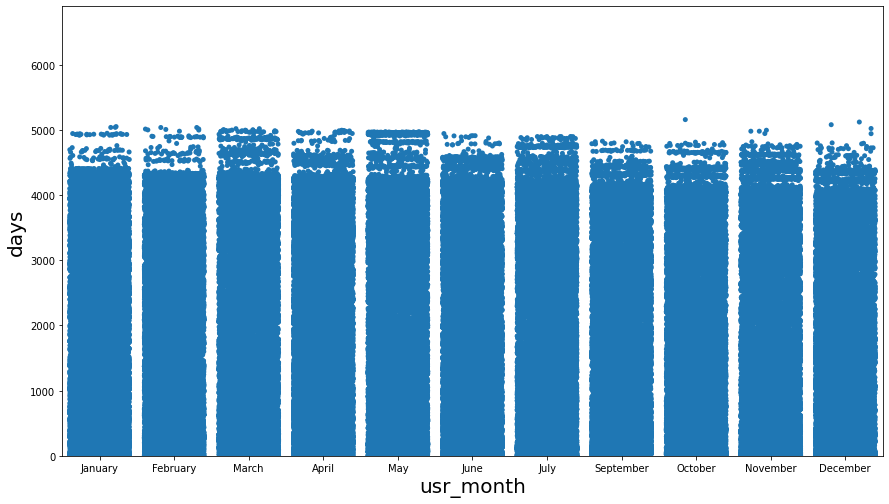

In [36]:

plt.figure(figsize = [14.70, 8.27])
sb.stripplot(data = tweet_df, x = 'usr_month', y = 'days', jitter = 0.40, color = base_color, order = month_order)
plt.xlabel('usr_month', fontsize=20)
plt.ylim(0, 6900)
plt.ylabel('days', fontsize=20)
plt.show();